In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
!pip install scikit-learn


In [7]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Twitter_Data.csv')
df = df.dropna()


In [8]:
import pandas as pd
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


clean_text    4
category      7
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.columns


Index(['clean_text', 'category'], dtype='object')

In [13]:
import re

# Find the text column automatically
text_col = None
for col in df.columns:
    if df[col].dtype == 'object':
        text_col = col
        break

print("Using text column:", text_col)

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply cleaning
df['clean_text'] = df[text_col].apply(clean_text)

df.head()





Using text column: clean_text


,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [14]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


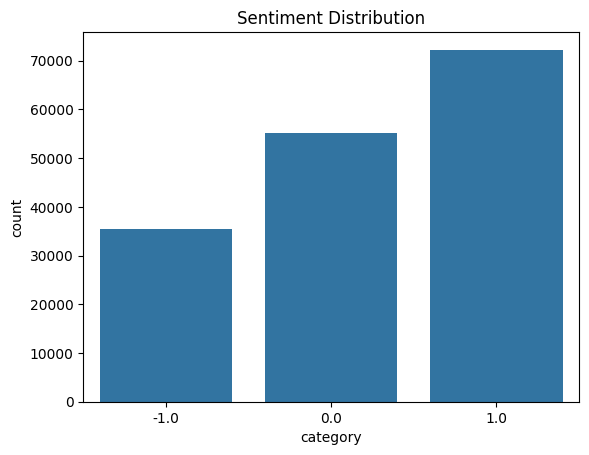

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='category')
plt.title('Sentiment Distribution')
plt.show()


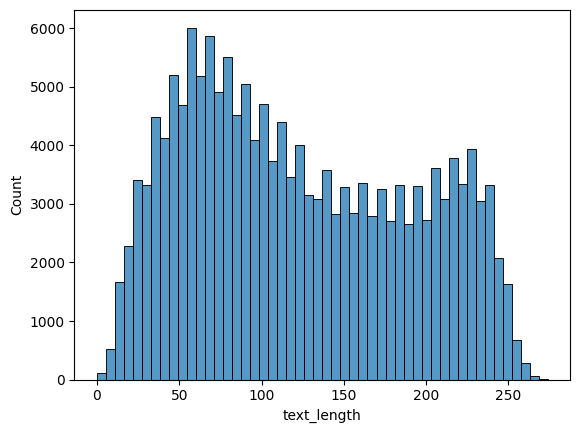

In [16]:
df['text_length'] = df['clean_text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.show()

In [17]:
X = df['clean_text']
y = df['category']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)


X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
#model building
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


nb_preds = nb_model.predict(X_test_vec)

In [20]:
#model building
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)


lr_preds = lr_model.predict(X_test_vec)

In [21]:
#accuracy
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_preds))
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_preds))

Naive Bayes Accuracy: 0.7139350800760876
Logistic Regression Accuracy: 0.8446033012210836


In [22]:
#classification model
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

        -1.0       0.86      0.72      0.78      7102
         0.0       0.79      0.95      0.86     11042
         1.0       0.90      0.82      0.86     14450

    accuracy                           0.84     32594
   macro avg       0.85      0.83      0.83     32594
weighted avg       0.85      0.84      0.84     32594



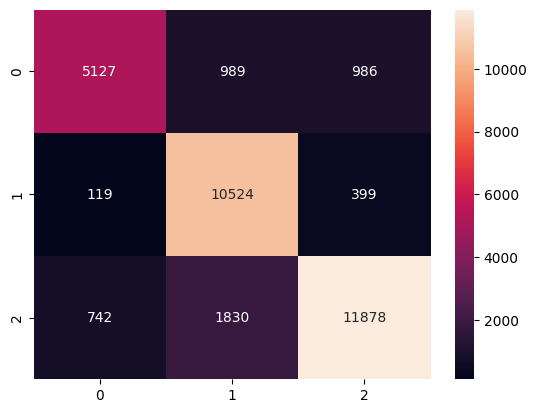

In [23]:
#confusion matrix
cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [24]:
#prediction on next text
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    pred = lr_model.predict(vector)
    return pred[0]


predict_sentiment("I really love this product")

np.float64(1.0)

In [33]:
!pip install wordcloud


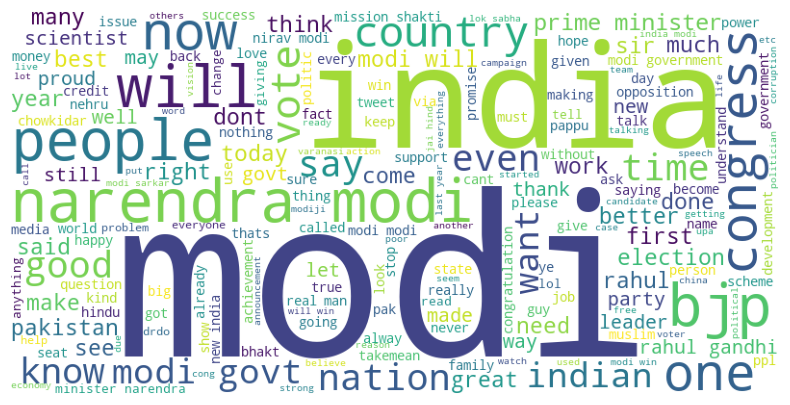

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# STEP 1: Create positive_text FIRST
positive_text = ' '.join(
    df[df['category'] == 1]['clean_text'].astype(str)
)

# STEP 2: Check if text exists
if len(positive_text.strip()) == 0:
    print("No text found for this category class")
else:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(positive_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


In [30]:
df['category'].value_counts()


category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

In [32]:
print(len(positive_text))



10074923


In [34]:
df.to_csv("final_sentiment_output.csv", index=False)
